**Numerical predictors**<br>
Establishing the temporal development of the word frequency effect across the response time window for the lexical decision latencies in the British Lexicon Project

Read in and pre-process lexical decision data(blp-items).

In [51]:
# Download data
download.file("http://crr.ugent.be/blp/txt/blp-items.txt.zip", "blp.zip") 
# Open connection to .txt file in .zip archive
conn = unz("blp.zip","blp-items.txt")
# Read data
blp = read.table(conn, head=TRUE) 
# Remove words without RT
blp = blp[-which(is.na(blp$rt)),]
# Round response times to integers
blp$rt = round(blp$rt)

# inspect data 
head(blp)

,spelling,lexicality,rt,zscore,accuracy,rt.sd,zscore.sd,accuracy.sd
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,a/c,N,668,0.3219620,0.7692308,180.0886,1.0972665,0.4240521
2,aband,N,706,0.4815975,0.9250000,170.1721,0.8614933,0.2667468
3,abayed,N,690,0.1577650,0.8684211,281.0502,1.0239438,0.3425700
4,abbear,N,561,-0.3614143,0.9500000,121.3605,0.5298673,0.2207214
5,abbears,N,611,-0.1372765,0.9750000,169.8579,0.8988931,0.1581139
6,abbens,N,598,-0.3845125,1.0000000,144.7800,0.5999183,0.0000000


Read in and pre-precess word frequency data(blp-stimuli).

In [52]:
# Download data
download.file("http://crr.ugent.be/blp/txt/blp-stimuli.txt.zip",
              "blp.stimuli.zip")
# Open connection to .txt file in .zip archive
conn = unz("blp.stimuli.zip","blp-stimuli.txt") 
# Read data
blp.stimuli = read.table(conn, head=TRUE, sep="\t")
# Restrict to words that appear in the SUBTLEX-US corpus
blp.stimuli = blp.stimuli[which(blp.stimuli$subtlex.frequency >= 1),]
# Log-transform the word frequency counts
blp.stimuli$log.frequency = log(blp.stimuli$subtlex.frequency)
# Restrict to the relevant columns
blp.stimuli = blp.stimuli[,c("spelling", "log.frequency")]

# inspect data
head(blp.stimuli)
# number of words in the BLP are present in the SUBTLEX-US corpus
length(unique(blp.stimuli$spelling))

,spelling,log.frequency
,<fct>,<dbl>
2,aas,0.0000000
3,aback,2.7080502
4,abaft,0.6931472
6,abase,0.6931472
9,abate,1.6094379
10,abates,0.6931472


[1] 25155

Add the frequency of the words to the response time data using the join() function from the plyr package:

In [53]:
# Load plyr library
library(plyr)
# Add the lexical information
blp = join(blp, blp.stimuli, type = "inner")

# inspect data
head(blp)
tail(blp)

Joining by: spelling



,spelling,lexicality,rt,zscore,accuracy,rt.sd,zscore.sd,accuracy.sd,log.frequency
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,aced,N,515,-0.07543773,0.02631579,NA,NA,0.1622214,3.4965076
2,adly,N,650,0.08040012,0.97500000,280.1641,1.1568109,0.1581139,0.6931472
3,aight,N,728,0.51790401,0.94736842,243.1863,1.1539888,0.2262943,0.0000000
4,airstay,N,849,1.30323221,0.81578947,321.8085,1.1320451,0.3928595,0.0000000
5,aive,N,607,-0.11130308,0.98717949,178.2880,0.8046455,0.1132277,0.6931472
6,akes,N,600,-0.14817435,1.00000000,165.4855,0.9818185,0.0000000,0.0000000


,spelling,lexicality,rt,zscore,accuracy,rt.sd,zscore.sd,accuracy.sd,log.frequency
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25092,zoning,W,747,0.70271637,0.6052632,216.22278,0.9585838,0.4953554,3.871201
25093,zonked,W,659,0.45028532,0.4500000,93.65637,0.8219529,0.5038315,2.564949
25094,zoo,W,522,-0.65530551,1.0000000,148.66067,0.6651679,0.0000000,6.369901
25095,zoom,W,547,-0.51374572,0.9473684,142.78297,0.9094720,0.2262943,4.532599
25096,zoomed,W,546,-0.43496780,0.9000000,90.87132,0.5153471,0.3038218,2.197225
25097,zooming,W,620,-0.03306256,0.9000000,171.52135,0.7463354,0.3038218,3.178054


Fit a Cox proportional hazards model to the data.

Status column

In [54]:
blp$status = 1
blp_tmp = blp
blp_tmp$rt[which(blp_tmp$rt>1000)] = 1000
blp_tmp$status[which(blp_tmp$rt == 1000)] = 0

# inspect data
head(blp)

,spelling,lexicality,rt,zscore,accuracy,rt.sd,zscore.sd,accuracy.sd,log.frequency,status
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,aced,N,515,-0.07543773,0.02631579,NA,NA,0.1622214,3.4965076,1
2,adly,N,650,0.08040012,0.97500000,280.1641,1.1568109,0.1581139,0.6931472,1
3,aight,N,728,0.51790401,0.94736842,243.1863,1.1539888,0.2262943,0.0000000,1
4,airstay,N,849,1.30323221,0.81578947,321.8085,1.1320451,0.3928595,0.0000000,1
5,aive,N,607,-0.11130308,0.98717949,178.2880,0.8046455,0.1132277,0.6931472,1
6,akes,N,600,-0.14817435,1.00000000,165.4855,0.9818185,0.0000000,0.0000000,1


In [55]:
# Download survival package
devtools::install_github("kassambara/survminer", build_vignettes = FALSE, upgrade = "never", lib="/kaggle/working")


✔  checking for file ‘/tmp/RtmpERV2mZ/remotese7a1218d6/kassambara-survminer-194c72c/DESCRIPTION’ (348ms)
─  preparing ‘survminer’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘survminer_0.4.6.999.tar.gz’
   


In [56]:
# Load library
library(survival)
# Fit Cox proportional hazards model
cox.freq = coxph(Surv(rt, status) ~ log.frequency, data = blp)

# Show model summary
summary(cox.freq)

Call:
coxph(formula = Surv(rt, status) ~ log.frequency, data = blp)

  n= 25097, number of events= 25097 

                  coef exp(coef) se(coef)     z Pr(>|z|)    
log.frequency 0.385018  1.469640 0.003206 120.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              exp(coef) exp(-coef) lower .95 upper .95
log.frequency      1.47     0.6804      1.46     1.479

Concordance= 0.733  (se = 0.002 )
Likelihood ratio test= 11967  on 1 df,   p=<2e-16
Wald test            = 14419  on 1 df,   p=<2e-16
Score (logrank) test = 13624  on 1 df,   p=<2e-16


Generate survival curves for the 0.10, 0.25, 0.50, 0.75, and 0.90 quantiles of the word frequency distribution.

In [57]:
# Create data frame for predictions
newdata.freq = data.frame("log.frequency" = quantile(blp$log.frequency, c(0.1, 0.25, 0.5, 0.75, 0.9)))
# Inspect data frame
newdata.freq

# Generate survival curves
surv.freq = survfit(cox.freq, newdata = newdata.freq)
# Inspect survival curves
surv.freq

,log.frequency
,<dbl>
10%,0.6931472
25%,1.7917595
50%,3.2188758
75%,4.7957905
90%,6.4769724


Call: survfit(formula = cox.freq, newdata = newdata.freq)

        n events median 0.95LCL 0.95UCL
10% 25097  25097    702     700     704
25% 25097  25097    670     669     672
50% 25097  25097    636     635     637
75% 25097  25097    605     604     606
90% 25097  25097    579     578     580

Calculate the value of the survival function for the 0.10, 0.25, 0.5, 0.75, and 0.90 quantiles of the word frequency distribution at 600 ms after stimulus onset.

In [ ]:
# in stall packege
install.packages("survminer")
# Load survival library
library(survminer)

In [60]:
# Create summary of survival curves
surv.freq.sum = surv_summary(surv.freq)

# Define columns of interest
cols = c("time", "surv", "upper", "lower", "strata")

# Inspect survival curves at 600 ms
surv.freq.sum[which(surv.freq.sum$time==600), cols]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,time,surv,upper,lower,strata
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,600,0.8802023,0.8839037,0.8765164,10%
704,600,0.8230089,0.8275455,0.8184971,25%
1263,600,0.7135970,0.7193613,0.7078789,50%
1822,600,0.5383449,0.5458789,0.5309148,75%
2381,600,0.3063603,0.3157476,0.2972520,90%


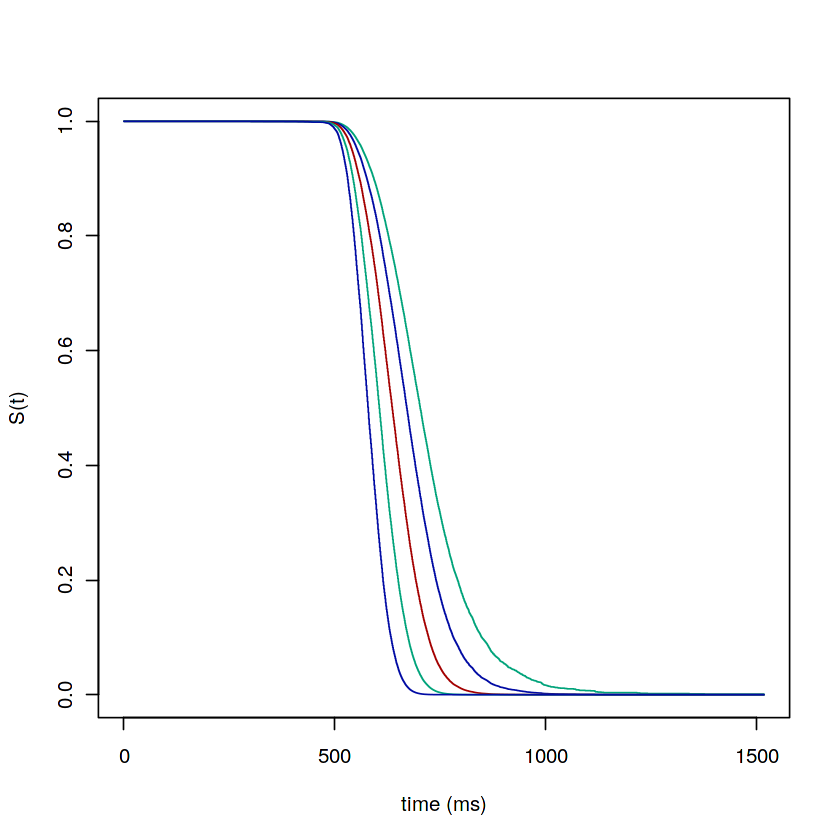

In [61]:
# Plot survival curves
plot(surv.freq, xlab = "time (ms)", ylab = "S(t)",
     col = c("#00a37a", "#000aa3", "#a30000"))

In [62]:
# Check proportional hazards assumption
cox.zph.freq = cox.zph(cox.freq)
# Inspect results
cox.zph.freq

              chisq df      p
log.frequency  1547  1 <2e-16
GLOBAL         1547  1 <2e-16

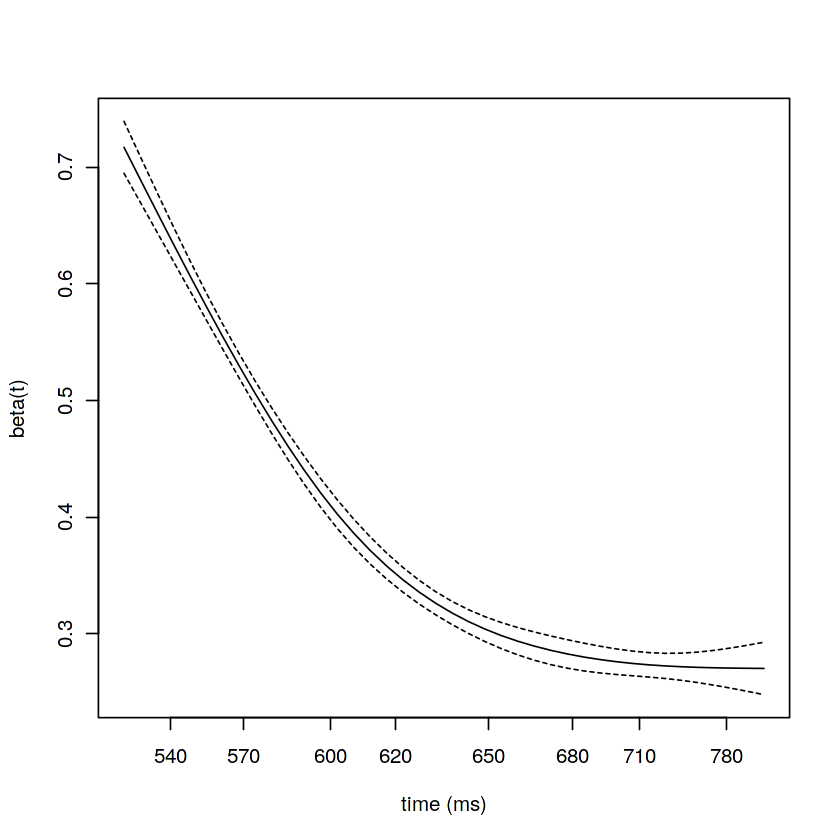

In [63]:
 # Plot Schoenfeld residuals
plot(cox.zph.freq, resid = FALSE, xlab = "time (ms)", ylab = "beta(t)")

In [66]:
# Fit Aalen additive hazards model to the data
aareg.freq = aareg(Surv(rt,status) ~ log.frequency, data = blp)

# Inspect results
aareg.freq

Call:
aareg(formula = Surv(rt, status) ~ log.frequency, data = blp)

  n= 25097 
    555 out of 559 unique event times used

                  slope     coef se(coef)     z        p
Intercept     -0.000671 3.97e-06 9.12e-07  4.35 1.38e-05
log.frequency  0.001120 3.09e-05 3.84e-07 80.30 0.00e+00

Chisq=6446.57 on 1 df, p=<2e-16; test weights=aalen

In [ ]:
# Plot cumulative coefficient
plot(aareg.freq, ylim=c(-0.1,1))